<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

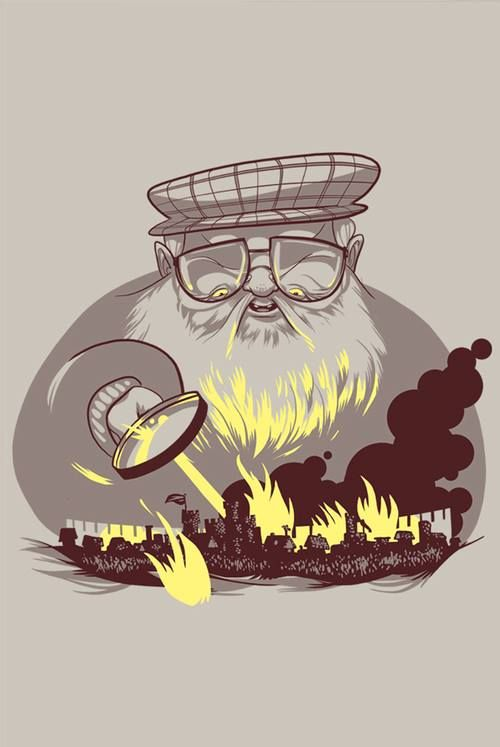

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [535]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [536]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [609]:
data = pd.read_csv('./data/game_of_thrones_train.csv', index_col='S.No')

In [610]:
data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [611]:
data.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

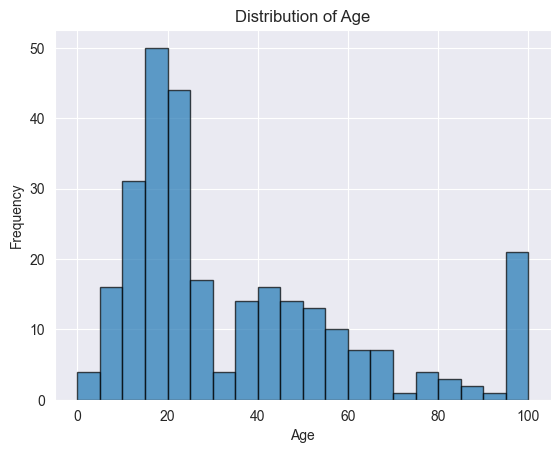

In [612]:
# Проверка распределения значений в 'age'
plt.hist(data['age'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Age не распределен нормально, поэтому лучше заполнить пропуски медианой

In [618]:
data['age'] = data['age'].fillna(data['age'].median())
data['title'] = data['title'].fillna('other')
data['house'] = data['house'].fillna('other')

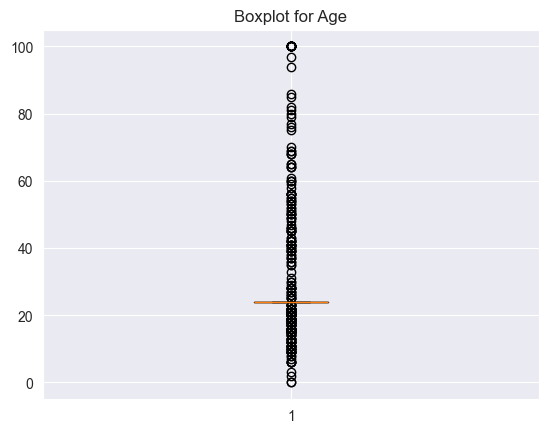

In [619]:
# Проверим age на выбросы
plt.boxplot(data['age'])
plt.title('Boxplot for Age')
plt.show()

In [608]:
# # В age наблюдаем слишком много выбросов, избавимся от них
# 
# # Расчет первого и третьего квартилей
# Q1 = data['age'].quantile(0.25)
# Q3 = data['age'].quantile(0.75)
# 
# # Расчет межквартильного размаха (IQR)
# IQR = Q3 - Q1
# 
# # Определение границ для выбросов
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# 
# # Удаление выбросов
# data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]
# 
# # Просмотр информации о данных после удаления выбросов
# print(data['age'].describe())

count    1285.0
mean       24.0
std         0.0
min        24.0
25%        24.0
50%        24.0
75%        24.0
max        24.0
Name: age, dtype: float64


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [544]:
data['isPopular'] = (data['popularity'] > 0.5).astype(int)
data.drop(columns=['popularity'], inplace=True)

In [545]:
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data.drop(columns=['numDeadRelations'], inplace=True)

In [621]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'northern mountain clans'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Valyrian': ['valyrian'],
    'Dothraki': ['dothraki'],
    'Vale': ['vale mountain clans', 'valemen'],
    'Rivermen': ['rivermen'],
    'Tyroshi': ['tyroshi'],
    'Astapori': ['astapori'],
    'Meereenese': ['meereenese'],
    'Sistermen': ['sistermen'],
    'Crannogmen': ['crannogmen'],
    'Lhazarene': ['lhazarene', 'lhazareen'],
    'Qohor': ['qohor'],
    'Pentoshi': ['pentoshi'],
}
data['culture'] = data['culture'].str.lower().fillna('Other')
for key, values in cult.items():
    data['culture'] = data['culture'].replace(values, key)
data.culture.value_counts()

culture
Other             1069
Northmen           106
Ironborn            95
Free Folk           56
Braavosi            40
Valyrian            28
Vale                22
Dornish             21
Ghiscari            18
Dothraki            17
Westermen           14
Reach               13
Rivermen            10
Qartheen             6
Tyroshi              6
Summer Islands       6
Astapori             4
Stormlander          4
Lysene               3
Westerosi            3
Lhazarene            2
Meereenese           2
Andal                2
Myrish               2
Sistermen            2
Crannogmen           2
Qohor                1
Norvoshi             1
vale                 1
Pentoshi             1
Name: count, dtype: int64

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [547]:
data.drop(columns=['dateOfBirth', 'spouse', 'mother', 'father', 'heir', 'isAliveHeir', 'isAliveSpouse',
                   'isAliveMother', 'isAliveFather'
                   ], inplace=True)

In [548]:
data.isna().sum().sort_values()

name                 0
title                0
male                 0
culture              0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
age                  0
isAlive              0
isPopular            0
boolDeadRelations    0
dtype: int64

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

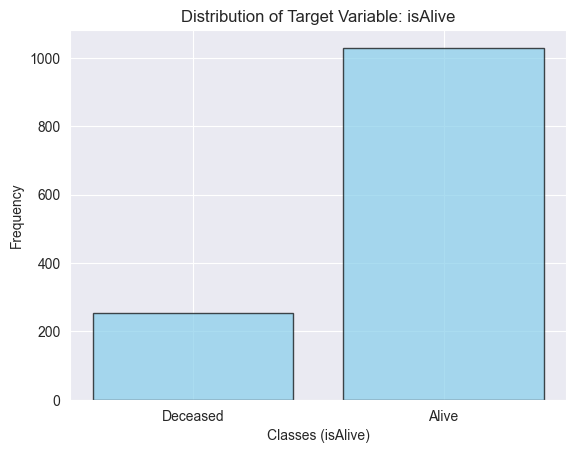

In [549]:
target_info = data['isAlive'].value_counts()

# Построим визуализацию распределения целевой переменной, чтобы оценить баланс классов
plt.bar(target_info.index, target_info.values, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Classes (isAlive)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable: isAlive')
plt.xticks([0, 1], ['Deceased', 'Alive'])
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

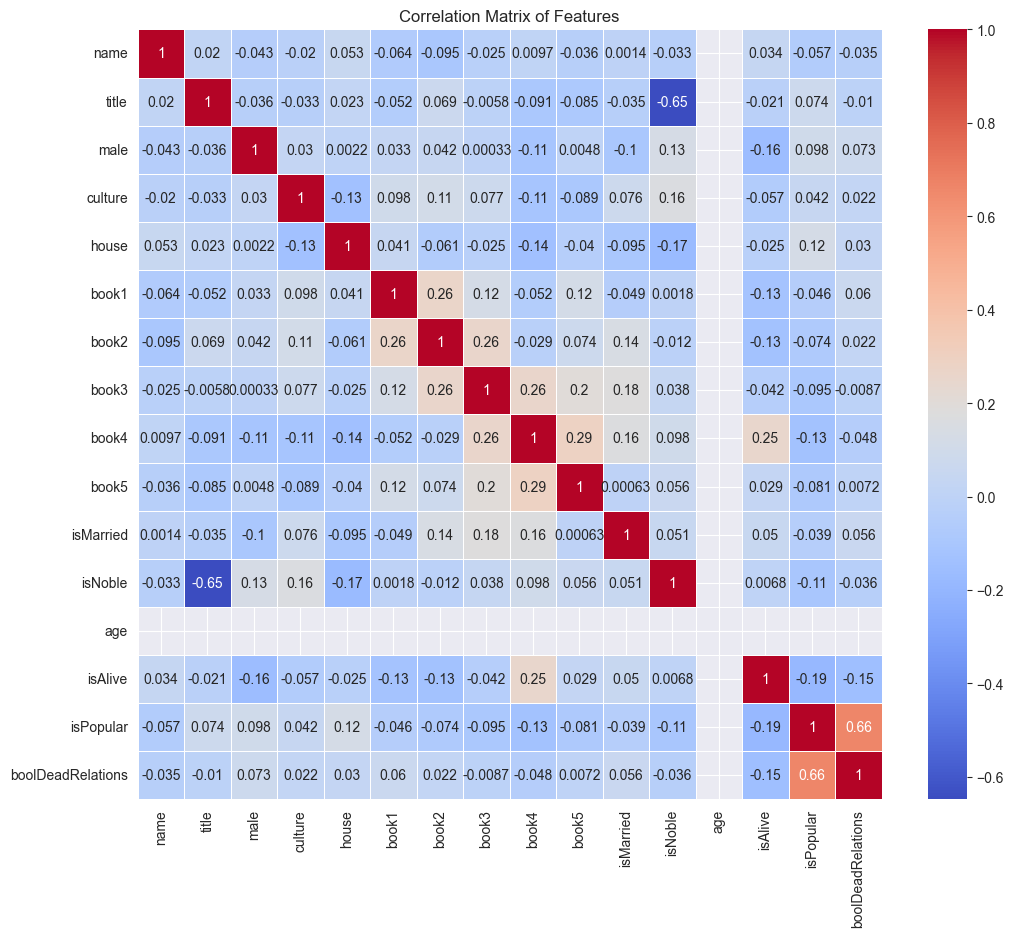

In [550]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

isNoble и title имеют умеренно отрицательную корреляцию, в зависимости от будущей модели, можно удалить признак title

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

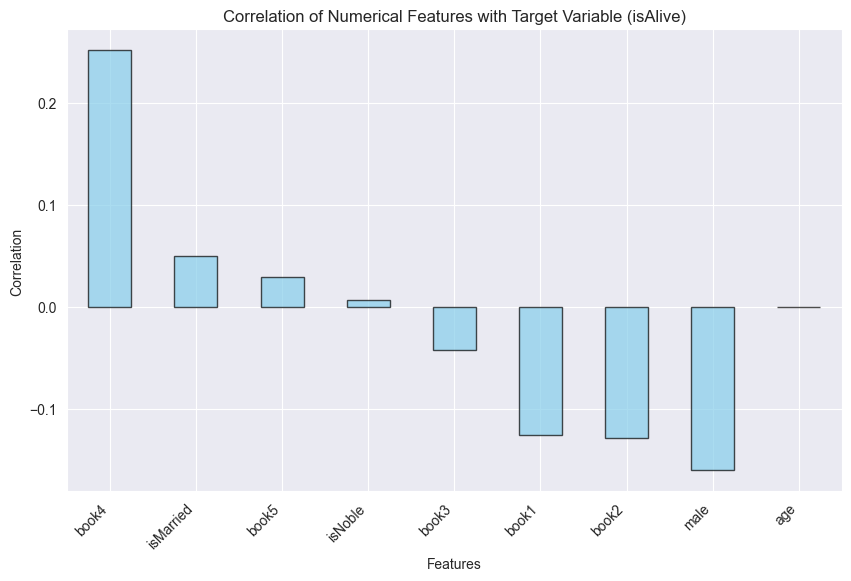

In [551]:
# Анализ корреляции количественных признаков с целевой переменной
# Выбираем числовые признаки
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Рассчитываем корреляцию количественных признаков с целевой переменной 'isAlive'
correlation_with_target = numeric_features.corr()['isAlive'].sort_values(ascending=False)

# Построим график для визуализации корреляции количественных признаков с целевой переменной
plt.figure(figsize=(10, 6))
correlation_with_target.drop('isAlive').plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Correlation of Numerical Features with Target Variable (isAlive)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

Наибольшую положительную корреляцию с таргетом имеет признак book4, отрицательную - age

In [552]:
# Можно попрбовать удалить малосвязные признаки
low_correlation_features = correlation_with_target[abs(correlation_with_target) < 0.05].index

# Удаление признаков с низкой корреляцией
data = data.drop(columns=low_correlation_features)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [553]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

X.shape, y.shape

((1285, 12), (1285,))

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [554]:
from sklearn.model_selection import train_test_split

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1028, 12), (257, 12), (1028,), (257,))

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [556]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [557]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [558]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [559]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [560]:
# Шаг 1. создание модели
models = {
    "AdaBoostClassifier": AdaBoostClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}

# Шаг 2. обучение модели
predictions = {}

# Обучение каждой модели и получение предсказаний на тестовой выборке
for model_name, model in models.items():
    # Шаг 2: обучение модели
    model.fit(X_train_scaled, y_train)

    # Шаг 3: предсказание на тестовых данных
    y_pred = model.predict(X_test_scaled)

    # Сохранение предсказаний в словарь
    predictions[model_name] = y_pred


C:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [561]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [562]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8444


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [563]:
# Шаг 4. Оценка предсказания по метрике accuracy
for model_name in models.keys():
    accuracy = accuracy_score(y_test, predictions[model_name])
    print(f"Accuracy of {model_name}: {accuracy:.4f}")

Accuracy of AdaBoostClassifier: 0.8171
Accuracy of RandomForestClassifier: 0.8016
Accuracy of GaussianProcessClassifier: 0.8093
Accuracy of GaussianNB: 0.8171
Accuracy of KNeighborsClassifier: 0.8327
Accuracy of SVC: 0.8405
Accuracy of DecisionTreeClassifier: 0.7276


In [580]:
from sklearn.model_selection import GridSearchCV

param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 1.5],
    'algorithm': ['SAMME']
}

# Настройка GridSearchCV для подбора параметров
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train)

# Вывод лучших параметров
best_params_adaboost = grid_search_adaboost.best_params_
best_params_adaboost

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}

In [581]:
best_params_adaboost = grid_search_adaboost.best_params_
best_rf_model = AdaBoostClassifier(**best_params_adaboost)
best_rf_model.fit(X_train, y_train)

y_pred_best = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best AdaBoostClassifier: {accuracy:.4f}")

Accuracy of the best AdaBoostClassifier: 0.8482


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [564]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [583]:
submission = pd.read_csv("./data/submission.csv", index_col='S.No')

In [584]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

In [601]:
# Загрузка данных из файла game_of_thrones_test.csv
test_data_path = "./data/game_of_thrones_test.csv"
test_data = pd.read_csv(test_data_path)

test_data['age'] = test_data['age'].fillna(test_data['age'].median())
test_data['title'] = test_data['title'].fillna('other')
test_data['house'] = test_data['house'].fillna('no house')

Q1 = test_data['age'].quantile(0.25)
Q3 = test_data['age'].quantile(0.75)

# Расчет межквартильного размаха (IQR)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
test_data = test_data[(test_data['age'] >= lower_bound) & (test_data['age'] <= upper_bound)]

test_data['isPopular'] = (test_data['popularity'] > 0.5).astype(int)
test_data.drop(columns=['popularity'], inplace=True)
test_data['boolDeadRelations'] = test_data['numDeadRelations'] > 0
test_data.drop(columns=['numDeadRelations'], inplace=True)
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'northern mountain clans'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Valyrian': ['valyrian'],
    'Dothraki': ['dothraki'],
    'Vale': ['vale mountain clans', 'valemen'],
    'Rivermen': ['rivermen'],
    'Tyroshi': ['tyroshi'],
    'Astapori': ['astapori'],
    'Meereenese': ['meereenese'],
    'Sistermen': ['sistermen'],
    'Crannogmen': ['crannogmen'],
    'Lhazarene': ['lhazarene', 'lhazareen'],
    'Qohor': ['qohor'],
    'Pentoshi': ['pentoshi'],
}
test_data['culture'] = test_data['culture'].str.lower().fillna('Other')
for key, values in cult.items():
    test_data['culture'] = test_data['culture'].replace(values, key)

test_data.drop(columns=['dateOfBirth', 'spouse', 'mother', 'father', 'heir', 'isAliveHeir', 'isAliveSpouse',
                        'isAliveMother', 'isAliveFather', 'S.No'
                        ], inplace=True)


from sklearn.preprocessing import LabelEncoder

categorical_columns = test_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    test_data[col] = label_encoders[col].fit_transform(test_data[col])
    
numeric_features = test_data.select_dtypes(include=['int64', 'float64'])


# Удаление признаков с низкой корреляцией
test_data = test_data.drop(columns=low_correlation_features)    

# Используем модель для предсказания на тестовых данных
test_predictions = best_rf_model.predict(test_data)

# Создаем DataFrame для submission
submission = pd.DataFrame({
    'id': test_data.index,  # предполагаем, что в файле test есть колонка с id
    'isAlive': test_predictions
})

# Сохраняем результат в файл submission.csv
submission_file_path = "./data/submission.csv"
submission.to_csv(submission_file_path, index=False)

# Путь к сохраненному файлу
submission_file_path

'./data/submission.csv'